## Credit Risk Assessment Analysis

### The major focus of this project is to understand the credit risk caused to certain banks and what are the parameters under which these kind of issues can be solved.

In [1]:
#importing the libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset for analysis
df = pd.read_csv('crd.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Feature Engineering and Exploratory Data Analysis

In [3]:
#reading a sample of the dataset
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
27112,31,123000,MORTGAGE,15.0,VENTURE,C,19000,13.47,0,0.15,Y,9
29985,48,41500,RENT,3.0,MEDICAL,A,5000,7.29,0,0.12,N,16
697,25,59004,RENT,1.0,PERSONAL,D,20000,14.84,1,0.34,Y,2
20471,28,30000,RENT,1.0,EDUCATION,C,4800,13.47,0,0.16,N,8
22559,29,89000,RENT,2.0,PERSONAL,A,7200,NaN,0,0.08,N,10
10531,26,68399,MORTGAGE,7.0,PERSONAL,A,10500,6.91,0,0.15,N,3
20138,34,30000,RENT,0.0,MEDICAL,B,4000,9.63,0,0.13,N,6
9366,21,55400,MORTGAGE,5.0,HOMEIMPROVEMENT,C,5000,14.27,1,0.09,N,4
29072,27,140987,MORTGAGE,5.0,VENTURE,A,6450,5.99,0,0.05,N,6
18467,28,98000,RENT,0.0,HOMEIMPROVEMENT,D,20000,14.96,1,0.20,N,6


In [4]:
#getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
#dropping the null values if there are any in the dataset
df.dropna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
#checking if there are any other null values present within the dataset
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
#removing the other null values in the dataset
df.dropna(axis=0,inplace=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
df.shape

(28638, 12)

In [9]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        14551
MORTGAGE    11801
OWN          2192
OTHER          94
Name: count, dtype: int64

In [10]:
df['loan_grade'].value_counts()

loan_grade
A    9402
B    9151
C    5699
D    3248
E     870
F     209
G      59
Name: count, dtype: int64

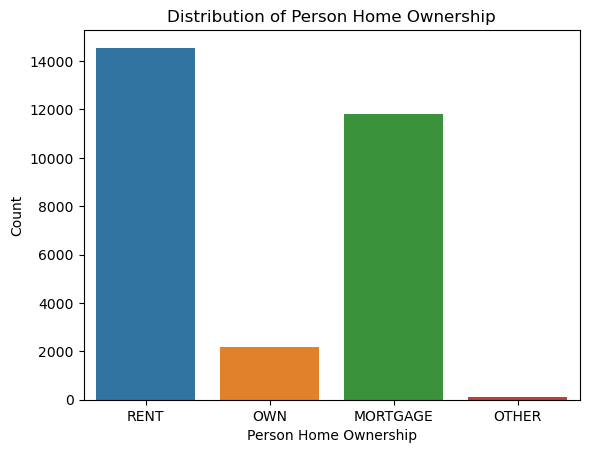

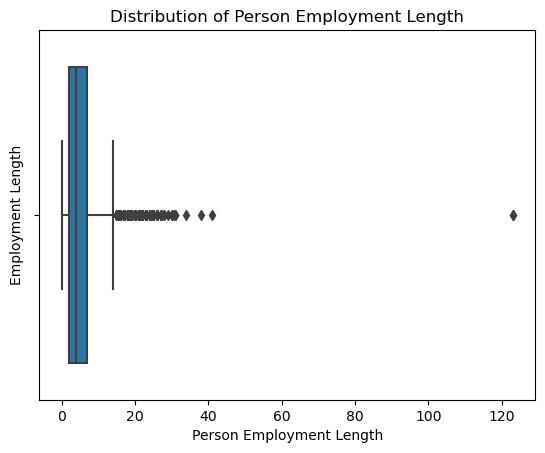

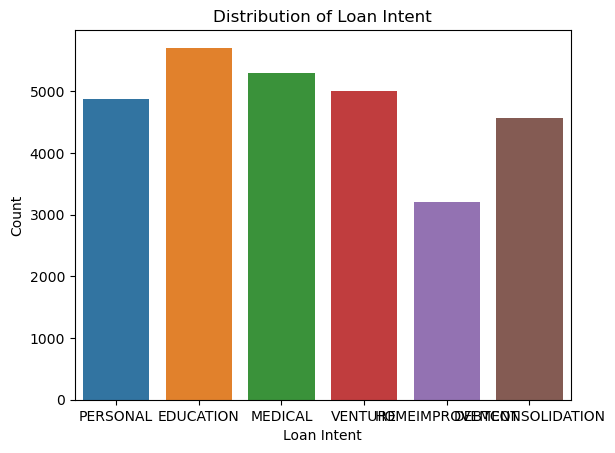

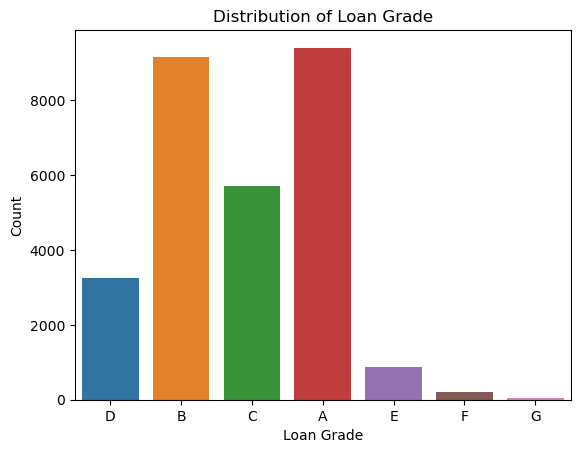

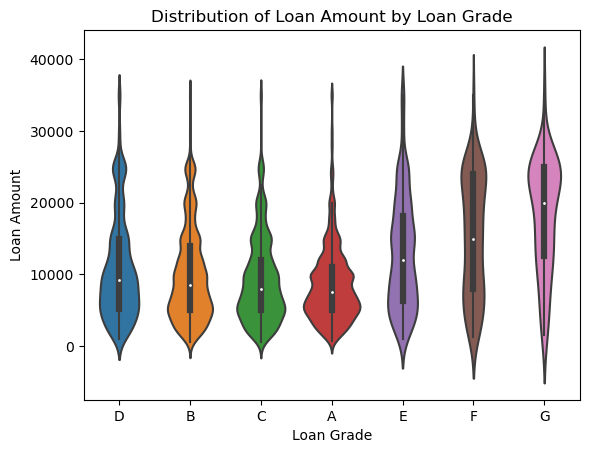

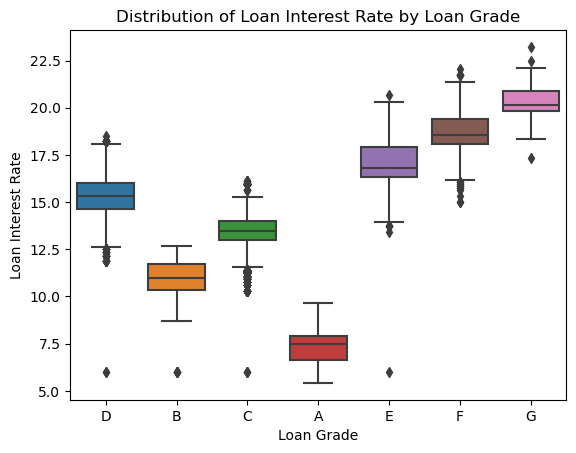

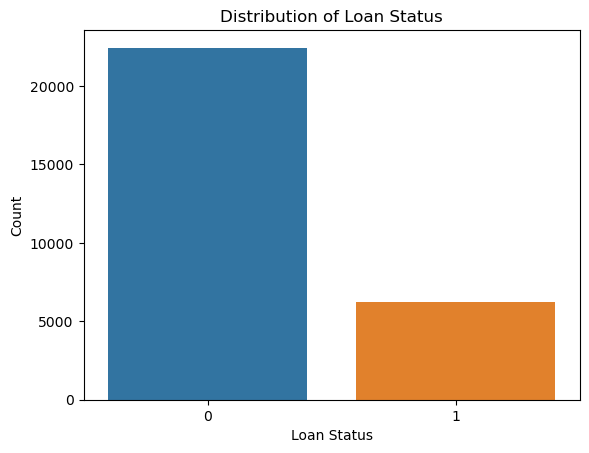

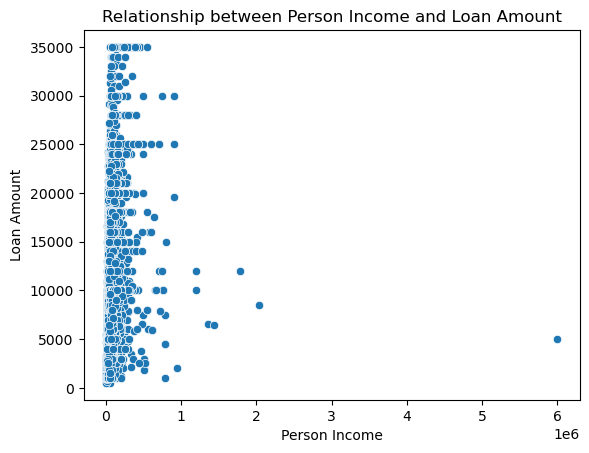

In [11]:
# Univariate Analysis (Numerical Features)

# Histogram for person_age
# sns.histplot(data=df, x="person_age")
# plt.xlabel("Person Age")
# plt.ylabel("Frequency")
# plt.title("Distribution of Person Age")
# plt.show()

# Boxplot for person_income
# sns.boxplot(x="person_income", data=df)
# plt.xlabel("Person Income")
# plt.ylabel("Income")
# plt.title("Distribution of Person Income")
# plt.show()

# Countplot for person_home_ownership
sns.countplot(x="person_home_ownership", data=df)
plt.xlabel("Person Home Ownership")
plt.ylabel("Count")
plt.title("Distribution of Person Home Ownership")
plt.show()

# Boxplot for person_emp_length
sns.boxplot(x="person_emp_length", data=df)
plt.xlabel("Person Employment Length")
plt.ylabel("Employment Length")
plt.title("Distribution of Person Employment Length")
plt.show()

# Countplot for loan_intent
sns.countplot(x="loan_intent", data=df)
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.title("Distribution of Loan Intent")
plt.show()

# Univariate Analysis (Categorical Features)

# Countplot for loan_grade
sns.countplot(x="loan_grade", data=df)
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.title("Distribution of Loan Grade")
plt.show()

# Violin plot for loan_amnt by loan_grade
sns.violinplot(x="loan_grade", y="loan_amnt", data=df)
plt.xlabel("Loan Grade")
plt.ylabel("Loan Amount")
plt.title("Distribution of Loan Amount by Loan Grade")
plt.show()

# Boxplot for loan_int_rate by loan_grade
sns.boxplot(x="loan_grade", y="loan_int_rate", data=df)
plt.xlabel("Loan Grade")
plt.ylabel("Loan Interest Rate")
plt.title("Distribution of Loan Interest Rate by Loan Grade")
plt.show()

# Countplot for loan_status
sns.countplot(x="loan_status", data=df)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")
plt.show()

# Bivariate Analysis

# Scatter plot between person_income and loan_amnt
sns.scatterplot(x="person_income", y="loan_amnt", data=df)
plt.xlabel("Person Income")
plt.ylabel("Loan Amount")
plt.title("Relationship between Person Income and Loan Amount")
plt.show()


In [12]:
##applying label encoding to the dataset
data = df.copy()

In [13]:
#applying label encoder to the dataset
from sklearn.preprocessing import LabelEncoder

# Identify categorical features
categorical_features = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "loan_status",
    "cb_person_default_on_file"
]  # Replace with your actual categorical features

# Create a LabelEncoder object
le = LabelEncoder()

# Encode each categorical feature
for feature in categorical_features:
    data[feature] = le.fit_transform(df[feature])

# Save the updated dataset
data.to_csv("encoded_dataset.csv", index=False)

In [14]:
data = pd.read_csv("encoded_dataset.csv")

In [15]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
28634,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
28635,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
28636,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


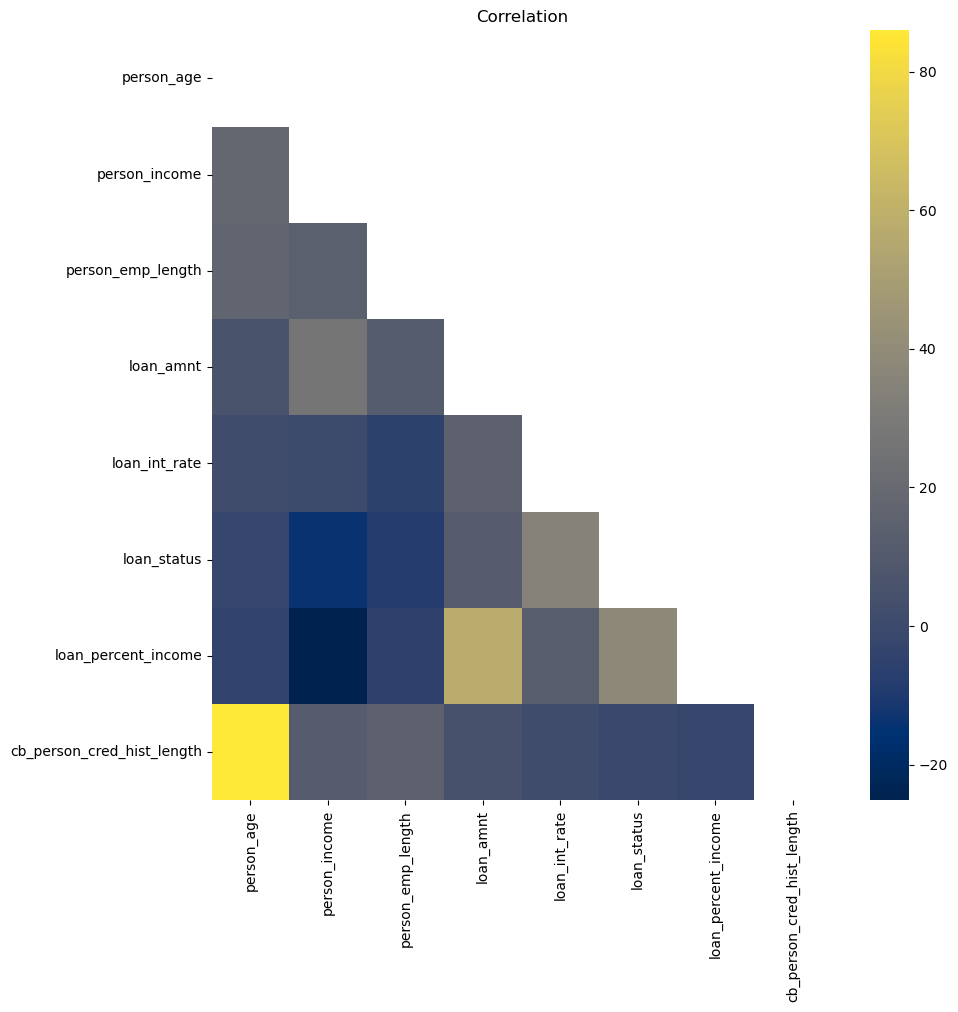

In [16]:
plt.figure(figsize=(10, 10)) 
data_num = df.select_dtypes(include=['number'])
corr = data_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr * 100, cmap = 'cividis', annot= True, mask=mask)
plt.title('Correlation')
plt.show()



In [17]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [18]:
X=data.drop(['loan_status'],axis=1).values
y=data['loan_status'].values

In [19]:
##splitting the dataset for analysis
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
##applying standard scaler for this dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
X_train

array([[-0.43340234,  0.58547569, -1.17429149, ..., -0.74577645,
        -0.46638619, -0.69441265],
       [-0.74852651,  1.27364339,  0.91835148, ..., -1.30868996,
        -0.46638619, -0.94286645],
       [ 0.98465644, -0.48500741,  0.91835148, ...,  0.56768841,
        -0.46638619,  0.79631016],
       ...,
       [-0.9060886 , -0.65322618,  0.22080382, ...,  0.75532624,
         2.14414583, -0.44595885],
       [ 0.3544081 ,  2.42058956,  0.91835148, ..., -0.55813862,
        -0.46638619,  1.04476396],
       [ 0.82709436,  0.76898708, -1.17429149, ...,  0.0047749 ,
        -0.46638619,  0.05094875]])

In [22]:
##applying random forest for model building

from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=150)
classifier1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [23]:
##adding the predictor
y_pred=classifier1.predict(X_test)

In [24]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [25]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [26]:
#generating the confusion matrix along with the accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4417   26]
 [ 374  911]]


0.9301675977653632

In [27]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)

In [28]:
import xgboost

In [29]:
##applying xgboost
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
y_pred = classifier2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [31]:
#getting the accuracy for the same
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4411   32]
 [ 328  957]]


0.9371508379888268

In [34]:
##importing tensorflow
import tensorflow as tf

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.7831 - loss: 0.4569
Epoch 2/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8555 - loss: 0.3620
Epoch 3/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8644 - loss: 0.3378
Epoch 4/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8605 - loss: 0.3450
Epoch 5/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.8750 - loss: 0.3161
Epoch 6/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8765 - loss: 0.3137
Epoch 7/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8747 - loss: 0.3132
Epoch 8/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.8817 - loss: 0.3082
Epoch 9/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8830 - loss: 0.3032
Epoch 10/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.8858 - loss: 0.2984
Epoch 11/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.8890 - loss: 0.2903
Epoch 12/100
716/71

716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.9172 - loss: 0.2405
Epoch 68/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9164 - loss: 0.2414
Epoch 69/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.9144 - loss: 0.2469
Epoch 70/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.9158 - loss: 0.2421
Epoch 71/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.9175 - loss: 0.2456
Epoch 72/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.9188 - loss: 0.2402
Epoch 73/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.9157 - loss: 0.2429
Epoch 74/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.9144 - loss: 0.2430
Epoch 75/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.9156 - loss: 0.2444
Epoch 76/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9150 - loss: 0.2426
Epoch 77/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.9155 - loss: 0.2458
Epoch 78/100
716/716 ━━

In [37]:
y_pred=model.predict(X_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step


In [38]:
y_pred=y_pred>0.5

In [39]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
f1_score(y_test,y_pred)

0.7815556590591524

In [40]:
precision_score(y_test,y_pred)

0.9733178654292344

In [41]:
confusion_matrix(y_test,y_pred)

array([[4420,   23],
       [ 446,  839]])

In [42]:
recall_score(y_test,y_pred)

0.6529182879377432

<Axes: >

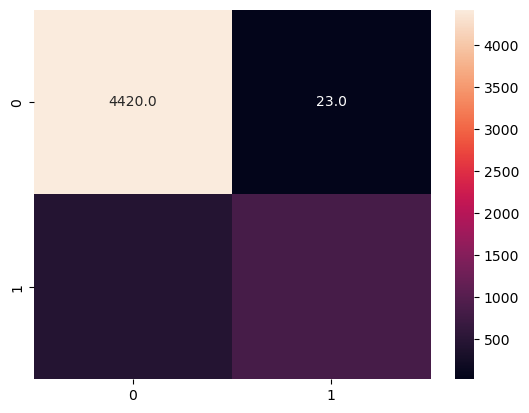

In [43]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.1f')